# The Change of Scoring Output across the National Basketball Association (NBA)

Liam O'Donnell <br>
CSE 6040

## Abstract

If you've been watching profressional basketball over the last 15 years, or even playing in a local pick-up game, you've likely noticed a large change in how the game is played. Offensive strategies have shifted from low post dominant players such as Shaquille O'Neil to prolific shooters such as Stephen Curry. When did this change happen? Is scoring increasing? How many threes are players shooting now compared to 20 years ago? In this notebook, I will take a look at NBA player data and perform an analysis on how scoring has changed in the NBA

## The Dataset

The NBA players dataset I used was taken from Kagle (LINK: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?resource=download&select=Player+Totals.csv) <br>

I used the "Player Totals" dataset.

In [111]:
## Importing relevant libaries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [112]:
## Reading csv
df = pd.read_csv('Player Totals.csv')

In [113]:
## Inspecting Columns
df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

This is each players stats at the end of the season. The columns are as follows: <br>
* 'seas_id': ID of season
* 'season': Year of season
* 'player_id': ID of player
* 'player': Player name
* 'birth_year': Player birth year
* 'pos': Position of player
* 'age': Age of player
* 'experience': Years of experience of player
* 'lg': League name
* 'tm': Team player plays for
* 'g': Games appeared in
* 'gs': Games started
* 'mp': Minutes played
* 'fg': Field goals made
* 'fga': Field goals attempted
* 'fg_percent': FG percentage
* 'x3p': 3PT field goals made
* 'x3pa': 3PT field goals attempted
* 'x3p_percent': 3PT field goal percentage
* 'x2p': 2PT field goals made
* 'x2pa': 2PT field goals attempted
* 'x2p_percent': 2PT field goal percentage
* 'e_fg_percent': Field Goal efficiency percentage
* 'ft': Free Throws made
* 'fta': Free Throws attempted
* 'ft_percent': Free Throw Percentage
* 'orb': Offensive Rebounds
* 'drb': Defensive Rebounds
* 'trb': Total Rebounds
* 'ast': Assists
* 'stl': Steals
* 'blk': Blocks
* 'tov': Turn Overs
* 'pf': Percent of Teams Fouls
* 'pts': Total Points for Season

## Exploration

In [114]:
## Looking at first five rows of data
df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


In [115]:
## Taking a look at the "lg" column
df['lg'].value_counts()

NBA    29650
ABA     1638
BAA      582
Name: lg, dtype: int64

For this dataset, I am only going to focus on the NBA

In [116]:
df = df[df['lg'] == 'NBA']

Let's take a look at how far back this dataset goes

In [117]:
print('The earliest NBA season in this dataset is',min(df['season']))
print('The latest NBA season in this dataset is',max(df['season']))

The earliest NBA season in this dataset is 1950
The latest NBA season in this dataset is 2024


#### Cool! 74 years worth of basketball data. For this analysis, I'll just focus on the last 1980-present . I'll start out my exploration by looking at the total points scored by year and visualizing it

In [118]:
df = df[df['season'] > 1974]

In [119]:
pts_per_yr = df.groupby('season',as_index=False)['pts'].sum()

<AxesSubplot:xlabel='season'>

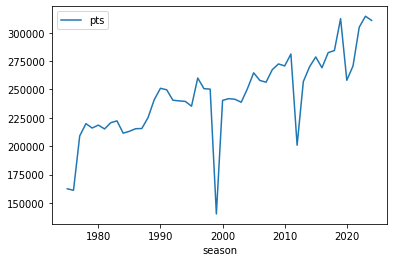

In [120]:
pts_per_yr.plot(x='season',y='pts')

After doing some research, it looks like there were two NBA lockouts that required the NBA season to be shortened:
* 1998-1999: Season shortened to 50 regular season games
* 2011-2012: Season shortened to 66 regular season games

Another fun fact: The 3 PT line was added in 1979 - that's why there's such as huge jump that year!

That definently checks out with the "valleys" that we see in the graphs. For a smoother graph, let's just graph 1980-present and exclude 1999,2012, and "covid" years 2021 & 2021

<AxesSubplot:xlabel='season'>

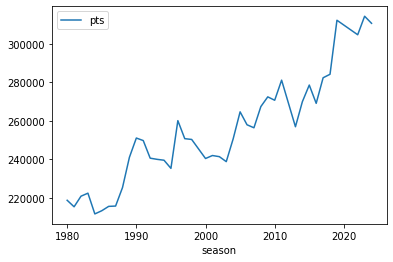

In [121]:
yrs_to_exclude = {1974,1975,1976,1977,1978,1979,1999,2012,2020,2021}
pts_per_yr = pts_per_yr[~pts_per_yr['season'].isin(yrs_to_exclude)]

pts_per_yr.plot(x='season',y='pts')

Obviously some pretty significant increases, especially in the last 10 years!

The NBA plays 2460 games/season across all of their teams. Let's look at how PPG has increased (will follow an identical shape with standardized Y axis)

<ipython-input-122-4ce6fabe8146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pts_per_yr['Points per game'] = pts_per_yr['pts']/2460


<AxesSubplot:xlabel='season'>

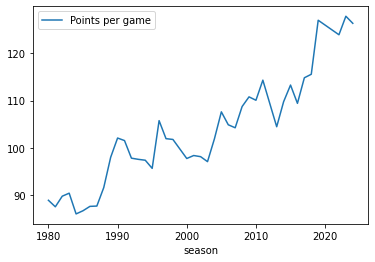

In [122]:
pts_per_yr['Points per game'] = pts_per_yr['pts']/2460
pts_per_yr.plot(x='season',y='Points per game')

### The emergence of 3PT Shooting

Many experts point to the fact that 3 Point shooting has greatly increased in today's NBA. Let's take a look and see if we can visually notice a difference

<AxesSubplot:xlabel='season'>

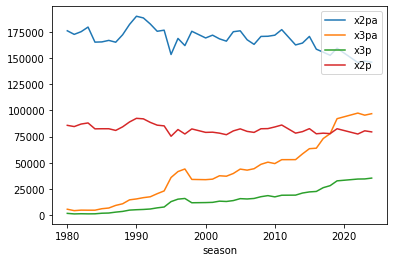

In [123]:
scoring_per_year = df.groupby('season',as_index=False)[['x2pa','x3pa','x3p','x2p']].sum()

## Excluding the same years as above
scoring_per_year = scoring_per_year[~scoring_per_year['season'].isin(yrs_to_exclude)]
scoring_per_year.plot(x='season')

This graph appears to confirm the above. Teams clearly are exloiting the 3 point field goal as a way to increase their scoring

But just how much more are threes being attempted on average? One way to do this is by fitting a linear regression line to "x3pa" where x is the season and Y is the threes attempted

For every season since 1980, the three-point attempts increase by 2052


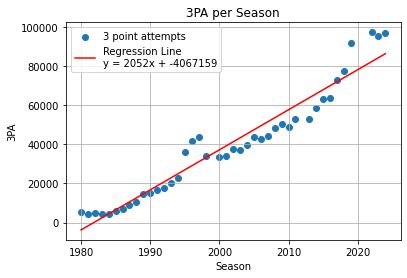

In [124]:
X = scoring_per_year['season'].values.reshape(-1, 1)
y = scoring_per_year['x3pa'].values

# Fitting regression model (Utilized sklearn's library)
regression = LinearRegression().fit(X, y)

# Slope and intercept
slope = regression.coef_[0]
intercept = regression.intercept_

# Predictions using the model
predictions = regression.predict(X)

# Using a scatter plot to best show results
plt.scatter(scoring_per_year['season'], scoring_per_year['x3pa'],label='3 point attempts')
plt.plot(scoring_per_year['season'], predictions, color='red', label=f'Regression Line\ny = {slope:.0f}x + {intercept:.0f}')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.title('3PA per Season')
plt.legend()
plt.grid(True)
print(f'For every season since 1980, the three-point attempts increase by {slope:.0f}')

plt.show()

Based on the above fit, each year since 1980 has seen about 2000+ more three point attempts than the previous year. Pretty nuts!

One thing that I noticed was the significant increase since 2012. I'll do the same steps as above, but this time just look at 2012-present

For every season since 2012, the three-point attempts increase (on avg) by 4318


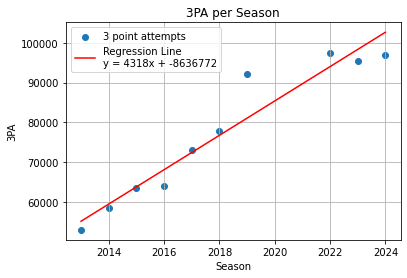

In [125]:
recent_scoring = scoring_per_year[scoring_per_year['season'] > 2012]

X = recent_scoring['season'].values.reshape(-1, 1)
y = recent_scoring['x3pa'].values

# Fitting regression model (Utilized sklearn's library)
regression = LinearRegression().fit(X, y)

# Slope and intercept
slope = regression.coef_[0]
intercept = regression.intercept_

# Predictions using the model
predictions = regression.predict(X)

# Using a scatter plot to best show
plt.scatter(recent_scoring['season'], recent_scoring['x3pa'],label='3 point attempts')
plt.plot(recent_scoring['season'], predictions, color='red', label=f'Regression Line\ny = {slope:.0f}x + {intercept:.0f}')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.title('3PA per Season')
plt.legend()
plt.grid(True)
print(f'For every season since 2012, the three-point attempts increase (on avg) by {slope:.0f}')

plt.show()

**Over double the increase season by season, just in the last 10 years!**

### But why the increase in 3 Point Attempts?

One of the most valuable statistics in basketball when weighing the options between shooting 2 point field goals and three point field goals is Points Per Shot (PPS). PPS is a player metric that divides the total points (2P made and 3P made) by the total field goal attempts. You can read more about PPS here: https://www.nbastuffer.com/analytics101/points-per-shot-attempt/#:~:text=Points%20Per%20Shot%20Attempt%20is,the%20total%20field%20goals%20attempts. <br>
<br>
Obviously, the goal in the game of basketball is to score points. The higher the points per shot statistic is, the more likely it is that the player's respective team will win. Let's take a look at how points per shot has changed over the years

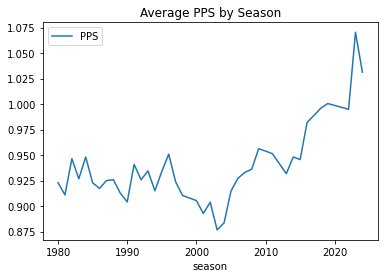

In [126]:
## Instead of aggregating first, I'll create a new column in df. I'll come back to why I did this later on.
df['PPS'] = round((df['x3p']*3+df['x2p']*2)/(df['fga']),2)
df = df[df['PPS'].notna()]
## Now aggregating and plotting average PPS by season (again excluding the same list of years as above)

pps_df = df.groupby('season',as_index=False)['PPS'].mean()
pps_df = pps_df[~pps_df['season'].isin(yrs_to_exclude)]
pps_df.plot(x='season')
plt.title('Average PPS by Season')
plt.show()

Another huge increase! By attempting more 3 pointers, teams are gaining more value with each shot they take. <br>
This still does not answer the question **why**? Let's take a look at players who have attempted the most three pointers in a particular season in NBA history

In [127]:
df.sort_values('x3pa',ascending=False)[:5]

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,PPS
3872,27871,2019,3880,James Harden,NaN,PG,29.0,10,NBA,HOU,...,66.0,452.0,518.0,586,158.0,58.0,387.0,244,2818,1.08
6062,26260,2016,3903,Stephen Curry,NaN,PG,27.0,7,NBA,GSW,...,68.0,362.0,430.0,527,169.0,15.0,262.0,161,2375,1.26
650,31786,2024,3903,Stephen Curry,NaN,PG,35.0,15,NBA,GSW,...,37.0,293.0,330.0,379,54.0,28.0,210.0,117,1956,1.15
3201,28559,2020,3880,James Harden,NaN,SG,30.0,11,NBA,HOU,...,70.0,376.0,446.0,512,125.0,60.0,308.0,227,2335,1.09
4176,28179,2019,3903,Stephen Curry,NaN,PG,30.0,10,NBA,GSW,...,45.0,324.0,369.0,361,92.0,25.0,192.0,166,1881,1.21


The names at the top of the list are James Harden and Stephen Curry. Let's take a look at how these two players stack up against the rest of the league. 

In [128]:
## Harden and curry df. Will do year,Curry_3pa,Harden_3pa
cur_hard = df[df['player'].isin({'James Harden','Stephen Curry'})]
df1 = cur_hard.groupby('season').agg(
    Curry_3pa=('x3pa', lambda x: x[cur_hard['player'] == 'Stephen Curry'].sum()),
    Harden_3pa=('x3pa', lambda x: x[cur_hard['player'] == 'James Harden'].sum())
).reset_index()

## Excluding Curry and Harden and building out a dataset with the average 3pa by the rest of the league
compare_df = df[~df['player'].isin({'James Harden','Stephen Curry'})]

compare_df = compare_df.groupby('season',as_index=False)['x3pa'].mean()

final_df = df1.join(compare_df.set_index('season'), how='left', on='season')
final_df.rename(columns={'x3pa':'League Average 3pa'},inplace=True) # Excludes curry and harden

Text(0.5, 1.0, 'James Harden and Stephan Curry vs. League Average (3PT Attempts)')

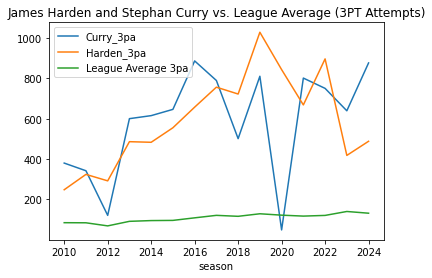

In [129]:
final_df.plot(x='season')
plt.title('James Harden and Stephan Curry vs. League Average (3PT Attempts)')

James Harden and Stephen Curry were drafted in the 2009 NBA draft. Their career high in Minutes per Game (MPG) was in 2013 at just over 38 minutes. Finally, Curry's most 3PA in a season was in 2016, while Harden's was in 2019 Let's add some constant lines to our FGA chart for some further context 

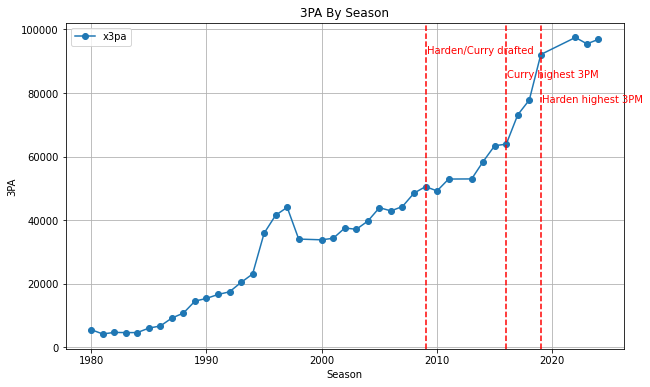

In [130]:
ax = scoring_per_year.plot(x='season', y='x3pa', figsize=(10, 6), marker='o')

# Defining Curry/Harden Events 
vertical_lines = {
    2009: 'Harden/Curry drafted',
    2016: 'Curry highest 3PM',
    2019: 'Harden highest 3PM'
}

vertical_position = scoring_per_year['x3pa'].max() * 0.95

# For loop for plotting axvline
for season, description in vertical_lines.items():
    ax.axvline(x=season, color='r', linestyle='--')
    ax.text(season + 0.1, vertical_position, description, rotation=0, fontsize=10, color='r')
    
    # Text was stacked on top of each other, adjusting...
    vertical_position -= scoring_per_year['x3pa'].max() * 0.08

plt.xlabel('Season')
plt.ylabel('3PA')
plt.title('3PA By Season')
plt.grid(True)
plt.show()

Clearly, the two of these players have had a significant impact on how players approach three point shooting. Due to their respective team's success, more and more teams model the offensive strategy around the 3 point shot. Many basketball fans would not be surprised to see the gap between 3PA and 2PA shrink in the coming decade. I hope you enjoyed checking out my notebook!